In [16]:
import random

from typing import List, Tuple

import time

# Лабораторная работа 1. Методы сортировки

Вариант: 19

## Блочная сортировка (Bucket sort)

Другие названия: 

- Карманная сортировка

- Корзинная сортировка

- Вёдерная сортировка

### Классификация алгоритма:

- По типу алгоритма: Сортировка распределением

- По устойчивости: Зависит от метода сортировки внутри блока

- По месту хранения данных: Зависит от метода сортировки внутри блока

- По выделению дополнительного пространства: $O(n)$

- По дополнительным затратам памяти: Зависит от метода сортировки внутри блока
   
P.S. В данной работе используется встроенный метод .sort()

## Время выполнения: 
  
### Наивысшая сложность
  Если у коллекции, с которой мы работаем, короткий диапазон – когда в одном контейнере много элементов с пустыми блоками.

  Если все элементы попадают в один блок, временная сложность зависит исключительно от алгоритма, который используется для сортировки его содержимого.

  При использовании сортировки вставкой ее временная сложность в худшем случае проявляется, когда список находится в обратном порядке. То есть: $O(n^2)$.
  
  - В худшем случае: $O(n^2)$

### Наименьшая сложность
  Если все элементы уже отсортированы и распределены равномерно. Поэтому каждый блок будет содержать одинаковое количество элементов.

  При этом создание сегментов заняло бы O(n), а сортировка вставки - O(k). Что дает временную сложность $O(n + k)$ .
  
  - В лучшем случае: $O(n)$
  
### Средняя сложность
  Встречается чаще всего, когда сортируемая коллекция случайная. В этом случае для завершения блочной сортировки требуется время O(n). Что делает ее очень эффективной.
  
  - В среднем: $O(n) $

### Описание алгоритма:

Блочная сортировка — алгоритм сортировки, в котором сортируемые элементы распределяются между конечным числом отдельных блоков (карманов, корзин) так, чтобы все элементы в каждом следующем по порядку блоке были всегда больше (или меньше), чем в предыдущем. Каждый блок затем сортируется отдельно, либо рекурсивно тем же методом, либо другим. Затем элементы помещаются обратно в массив. Этот тип сортировки может обладать линейным временем исполнения.

** Данный алгоритм требует знаний о природе сортируемых данных, выходящих за рамки функций "сравнить" и "поменять местами", достаточных для сортировки слиянием, сортировки пирамидой, быстрой сортировки, сортировки Шелла, сортировки вставкой. **



### Преимущества и недостатки алгоритма

Преимущества: 
- Относится к классу быстрых алгоритмов с линейным временем исполнения O(N) (на удачных входных данных).

Недостатки: 
- Сильно деградирует при большом количестве мало отличных элементов, или же на неудачной функции получения номера корзины по содержимому элемента. 
- В некоторых таких случаях для строк, возникающих в реализациях основанного на сортировке строк алгоритма сжатия BWT, оказывается, что быстрая сортировка строк в версии Седжвика значительно превосходит блочную сортировку скоростью.

In [8]:
# Python program for the above approach

# Bucket sort for numbers
# having integer part
def bucketSort(arr, numOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)

    # range(for buckets)
    rnge = (max_ele - min_ele) / numOfBuckets

    temp = []

    # create empty buckets
    for i in range(numOfBuckets):
        temp.append([])

    # scatter the array elements
    # into the correct bucket
    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)

        # append the boundary elements to the lower array
        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])

    # Sort each bucket individually
    for i in range(len(temp)):
        if len(temp[i]) != 0:
            temp[i].sort()

    # Gather sorted elements
    # to the original array
    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k += 1
    return arr


# Driver Code
arr = [9.8, 0.6, 10.1, 1.9, 3.07, 3.04, 5.0, 8.0, 4.8, 7.68]
numOfBuckets = 5
bucketSort(arr, numOfBuckets)
# print("Sorted array: ", arr)

[0.6, 1.9, 3.04, 3.07, 4.8, 5.0, 7.68, 8.0, 9.8, 10.1]

### Блок-схема

![img](./block.jpg)

### Псевдокод алгоритма

```
void bucketSort(vector<float> arr,int numOfBuckets){
    float max_ele = max(arr);
    float min_ele = min(arr);

    # range(for buckets)
    float basket_range = (max_ele - min_ele) / numOfBuckets;

    vector<float> buskets;

    # create empty buckets
    for (int i = 0; i < numOfBuckets; i++){
        buskets.push([]);
    }

    # scatter the array elements
    # into the correct bucket
    for (int i = 0; i < arr.size(); i++){
        float diff = (arr[i] - min_ele) / basket_range - int((arr[i] - min_ele) / basket_range)

        # append the boundary elements to the lower array
        if(diff == 0 && arr[i] != min_ele){
            buskets[int((arr[i] - min_ele) / basket_range) - 1].push(arr[i]);;
        }
        else {
            buskets[int((arr[i] - min_ele) / basket_range)].push(arr[i]);
        }
    }
    # Sort each bucket individually
    for (int i = 0; i < buskets.size(); i++){
        if (buskets[i].size() != 0) {
            buskets[i].sort();
        }
    }

    # Gather sorted elements
    # to the original array
    for(int k = 0; k < buskets.size(); k++){
        if(!busket.empty()){
            for(int i = 0; i < busket.size(); i++) {
                arr[k] = busket[i];
            }
        }
    }
    return arr
}
```

### Ручная троссировка

In [44]:
def bucketSort(arr, numOfBuckets):
    print("Unsort array: ", arr)
    max_ele = max(arr)
    min_ele = min(arr)

    rnge = (max_ele - min_ele) / numOfBuckets

    temp = []

    for i in range(numOfBuckets):
        temp.append([])
    print("our buskets: ", temp)
    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)
        print("add element ", arr[i])
        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])

        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])
        print(temp)
    print("sort each busket")
    for i in range(len(temp)):
        if len(temp[i]) != 0:
            temp[i].sort()
    print(temp)
    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k += 1
    print("sorted array: ", arr)

arr = [9.8, 0.6, 10.1, 1.9, 3.07, 3.04, 5.0, 8.0, 4.8, 7.68]
numOfBuckets = 5
bucketSort(arr, numOfBuckets)

Unsort array:  [9.8, 0.6, 10.1, 1.9, 3.07, 3.04, 5.0, 8.0, 4.8, 7.68]
our buskets:  [[], [], [], [], []]
add element  9.8
[[], [], [], [], [9.8]]
add element  0.6
[[0.6], [], [], [], [9.8]]
add element  10.1
[[0.6], [], [], [], [9.8, 10.1]]
add element  1.9
[[0.6, 1.9], [], [], [], [9.8, 10.1]]
add element  3.07
[[0.6, 1.9], [3.07], [], [], [9.8, 10.1]]
add element  3.04
[[0.6, 1.9], [3.07, 3.04], [], [], [9.8, 10.1]]
add element  5.0
[[0.6, 1.9], [3.07, 3.04], [5.0], [], [9.8, 10.1]]
add element  8.0
[[0.6, 1.9], [3.07, 3.04], [5.0], [8.0], [9.8, 10.1]]
add element  4.8
[[0.6, 1.9], [3.07, 3.04], [5.0, 4.8], [8.0], [9.8, 10.1]]
add element  7.68
[[0.6, 1.9], [3.07, 3.04], [5.0, 4.8], [8.0, 7.68], [9.8, 10.1]]
sort each busket
[[0.6, 1.9], [3.04, 3.07], [4.8, 5.0], [7.68, 8.0], [9.8, 10.1]]
sorted array:  [0.6, 1.9, 3.04, 3.07, 4.8, 5.0, 7.68, 8.0, 9.8, 10.1]


In [9]:
### Тестирование программы

sortmethod = bucketSort

assert sortmethod([1, 2, 3, 4], 2) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1], 2) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2], 2) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2], 2) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [10]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->List:
    '''Возвращает отсортированный массив'''
    return list(range(n))

def get_reverse_array(n:int)->List:
    '''Возвращает отсортированный в обратном порядке массив'''
    return list(range(n))[::-1]

def get_random_array(n:int)->List:
    '''Возвращает перемешанный массив'''
    return list(random.sample(range(n), n))


In [ ]:
### Литература

Алгоритмы сортировки данных (Основные понятие алгоритмов сортировки). URL:https://academy.yandex.ru/journal/osnovnye-vidy-sortirovok-i-primery-ikh-realizatsii

Описание алгоритма блочной сортировки. URL:https://www.internet-technologies.ru/articles/blochnaya-sortirovka-v-python.html

Ссылка на википедию с описанием блочной сортировки. URL: https://ru.wikipedia.org/wiki/Блочная_сортировка

Ссылка на статью в Habr по сортировкам распределением. URL: https://habr.com/ru/company/edison/blog/472466/

In [12]:

### Создаём сортируемые массивы
# Массивы для хранения результат замеров времени
times_sort = {}
times_reverse = {}
times_random = {}

In [31]:
#Массивы из 1000 элементов
times_sort.clear()
times_reverse.clear()
times_random.clear()
n = 10000
start = time.time()

sortmethod(list(get_sort_array(n)), 5)

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

8.98 ms


In [32]:
n=10000
start = time.time()

sortmethod(list(get_reverse_array(n)), 5)

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

6.98 ms


In [33]:
n = 10000
start = time.time()

sortmethod(list(get_random_array(n)), 5)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

18.95 ms


In [34]:
#Массивы из 5000 элементов
n = 50000
start = time.time()
 
sortmethod(list(get_sort_array(n)), 6)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

32.91 ms


In [35]:
n = 50000
start = time.time()
 
sortmethod(list(get_reverse_array(n)), 6)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

35.9 ms


In [36]:
n = 50000
start = time.time()
 
sortmethod(list(get_random_array(n)), 6)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

83.81 ms


In [37]:
#Массивы из 10000 элементов
n = 100000
start = time.time()
 
sortmethod(list(get_sort_array(n)), 4)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

74.83 ms


In [38]:
n = 100000
start = time.time()
 
sortmethod(list(get_reverse_array(n)), 4)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

72.82 ms


In [39]:
n = 100000
start = time.time()
 
sortmethod(list(get_random_array(n)), 4)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

145.61 ms


In [40]:
#Массивы из 25000 элементов
n = 250000
start = time.time()
 
sortmethod(list(get_sort_array(n)), 2)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

167.52 ms


In [41]:
n = 250000
start = time.time()
 
sortmethod(list(get_reverse_array(n)), 2)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

167.63 ms


In [42]:
n = 250000
start = time.time()
 
sortmethod(list(get_random_array(n)), 2)
 
end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

402.96 ms


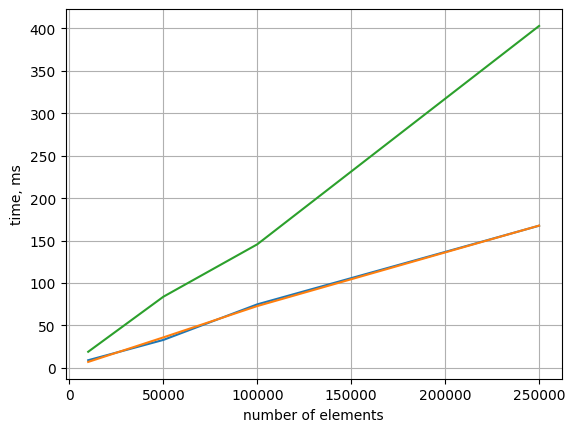

In [51]:
#Графики зависимости
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times_sort.keys(), times_sort.values(), times_reverse.keys(), times_reverse.values(), times_random.keys(), times_random.values())
plt.ylabel('time, ms')
plt.xlabel('number of elements')
plt.grid(True)
plt.show()
#синий - sort
#оранжевый - revers
#зеленый - random